## Import Packages

In [1]:
import pandas as pd
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
df= pd.read_csv('googleplaystore.csv')
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [3]:
len(df)

10841

##### Removing Duplicate if any

In [4]:
df =df.drop_duplicates()

In [5]:
len(df)

10358

## Cleaning the Data

In [6]:
df.isnull().sum()

App                  0
Category             0
Rating            1465
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### There are many NULL values in Rating 

In [7]:
df['Rating'].fillna((df['Rating'].mean()), inplace=True)

**We will fill that by calculating the RATING based on mean value**

In [8]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [9]:
# Drop NA values from all columns
df = df.dropna() 

In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

### Changing the Features 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  object 
 5   Installs        10346 non-null  object 
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  object 
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [12]:
# Converting the Installs and Price number into float value
chars_to_remove = [',', '+', '$']
col_to_clean = ['Installs', 'Price']

for col in col_to_clean:
    for char in chars_to_remove:
        df[col] = df[col].apply(lambda x: x.replace(char, ''))
    df[col] = df[col].astype(float)

In [13]:
# Converting the Size number into float value
float_size = []

for row in df['Size']:
    new_row = row[:-1]
    try:
        float_size.append(float(new_row))
    except:
        float_size.append(0) 
    
df['Size'] = float_size

df['Size'].head()

0    19.0
1    14.0
2     8.7
3    25.0
4     2.8
Name: Size, dtype: float64

In [15]:
float_version = []

for row in df['Android Ver']:
    try:
        new_row = float(row[:2])
    except:
        new_row = 0
    
    float_version.append(new_row)
    
df['Android Ver'] = float_version

df['Android Ver'].value_counts()

4.0    6694
2.0    1332
0.0    1220
5.0     572
3.0     282
1.0     136
6.0      58
7.0      46
8.0       6
Name: Android Ver, dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10346 non-null  object 
 1   Category        10346 non-null  object 
 2   Rating          10346 non-null  float64
 3   Reviews         10346 non-null  object 
 4   Size            10346 non-null  float64
 5   Installs        10346 non-null  float64
 6   Type            10346 non-null  object 
 7   Price           10346 non-null  float64
 8   Content Rating  10346 non-null  object 
 9   Genres          10346 non-null  object 
 10  Last Updated    10346 non-null  object 
 11  Current Ver     10346 non-null  object 
 12  Android Ver     10346 non-null  float64
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


## Exploring app categories and Android version

In [17]:
#Total Number of applications in each categories

total_categories = len(df['Category'].unique())
print('Number of categories = ', total_categories)

total_apps_in_categories = df['Category'].value_counts(sort=True, ascending=False)
data = [go.Bar(
       x = total_apps_in_categories.index, # index = category name
       y = total_apps_in_categories.values # values = count
)]
plotly.offline.iplot(data)

Number of categories =  33


> **Family and Game apps have the highest market prevalence**

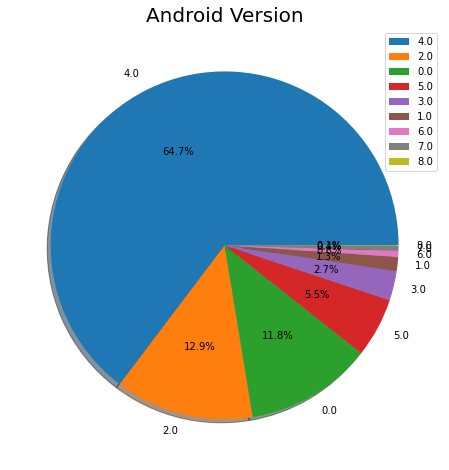

In [18]:
# To check how many percent of application based on Content Rating
fig = plt.figure(figsize=(16,8)) 
labels = df['Android Ver'].value_counts(sort=True).index
sizes = df['Android Ver'].value_counts(sort=True)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title('Android Version', size = 20)
plt.legend()
plt.show()

>  **Most of the apps support Android 4.0 and above**

## Distribution of App Ratings

Average app rating =  4.188182081146063


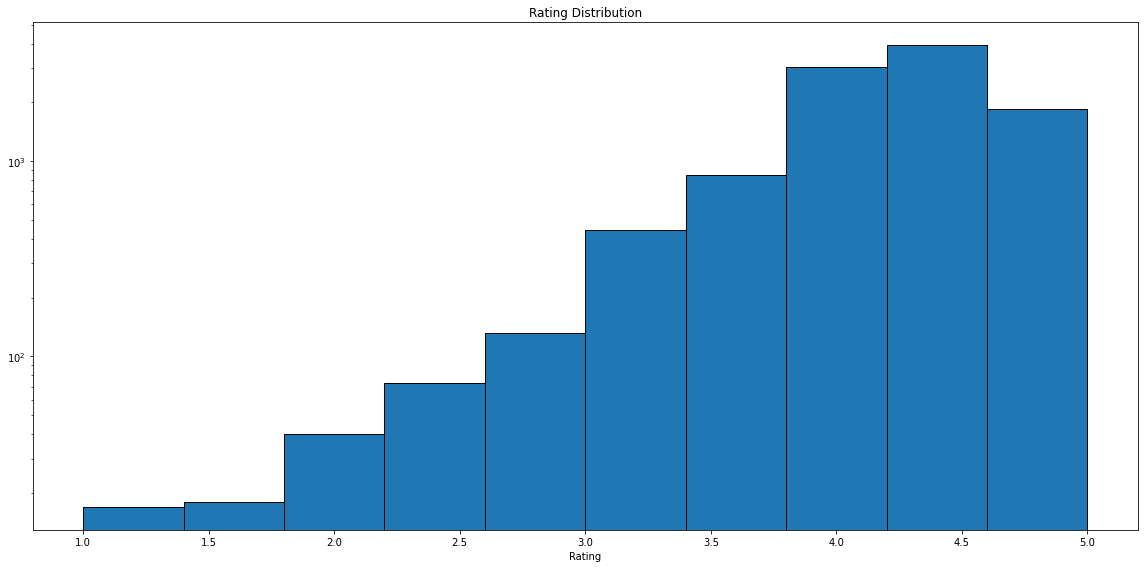

In [19]:
# Average rating of apps
avg_app_rating = df['Rating'].mean()
print('Average app rating = ', avg_app_rating)

fig = plt.figure(figsize=(16,8))
plt.hist(df['Rating'], edgecolor='black', log=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.tight_layout()
plt.show()

## Size and price of an app

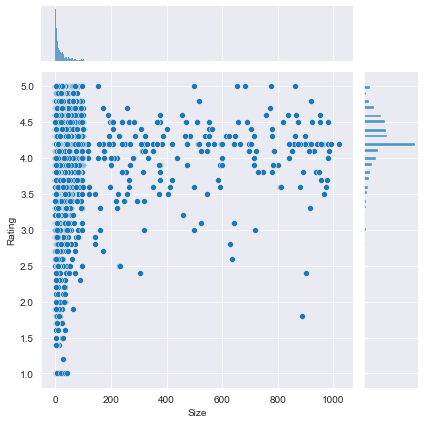

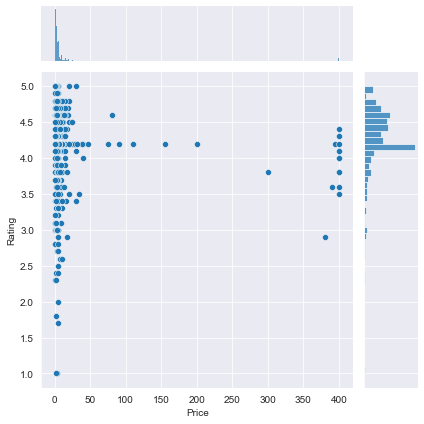

In [20]:
%matplotlib inline
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

# Subset for categories with at least 250 apps
large_categories = df.groupby(['Category']).filter(lambda x: len(x) >= 250)

plt1 = sns.jointplot(x=large_categories['Size'], y=large_categories['Rating'])

paid_apps =df[df['Type']=='Paid']

plt2 = sns.jointplot(x=paid_apps['Price'], y=paid_apps['Rating'])

## Relation between app category and app price

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


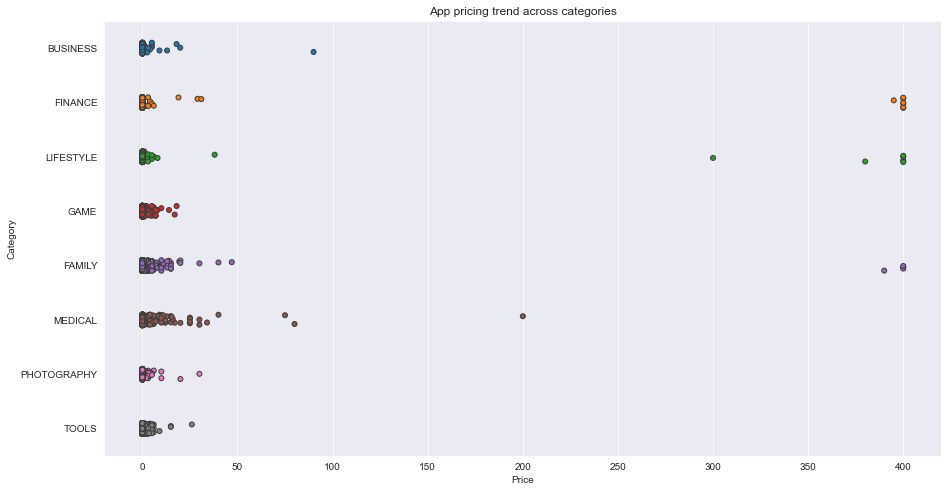

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Select a few popular app categories
popular_apps_cats = df[df.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY', 'MEDICAL', 'TOOLS', 'FINANCE', 'LIFESTYLE', 'BUSINESS'])]

ax = sns.stripplot(x=popular_apps_cats['Price'], y=popular_apps_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Apps whose Price is greater than 200
apps_above_200 = df[df['Price'] > 200]
apps_above_200[['Category', 'App', 'Price']]

## Popularity of paid apps vs free apps

In [22]:
trace0 = go.Box (
    # Data for paid apps
    y = df[df['Type']=='Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box (
    # Data for free apps
    y = df[df['Type']=='Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

> **Paid apps have relatively lower number of installs than free apps because users can't really get a feel for the app before buying it which is different from free apps, we can install it whenever we want**

## Sentiment analysis of user reviews

In [23]:
# Load the googleplaystore_user_reviews.csv
review_df = pd.read_csv('googleplaystore_user_reviews.csv')
review_df.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000


In [24]:
review_df.shape

(64295, 5)

In [25]:
review_df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [26]:
# Merge the two dataframes
merged_df = pd.merge(df, review_df, on='App')
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,like,Neutral,0.000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,NaN,NaN,NaN,NaN
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,I love colors inspyering,Positive,0.500,0.600000


In [27]:
# Drop NA values from Sentiment and Translated_Review columns
merged_df = merged_df.dropna(subset=['Translated_Review', 'Sentiment'])
merged_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,It bad >:(,Negative,-0.725,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,like,Neutral,0.000,0.000000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,I love colors inspyering,Positive,0.500,0.600000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0,I hate,Negative,-0.800,0.900000


In [28]:
merged_df.isnull().sum()

App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Installs                  0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

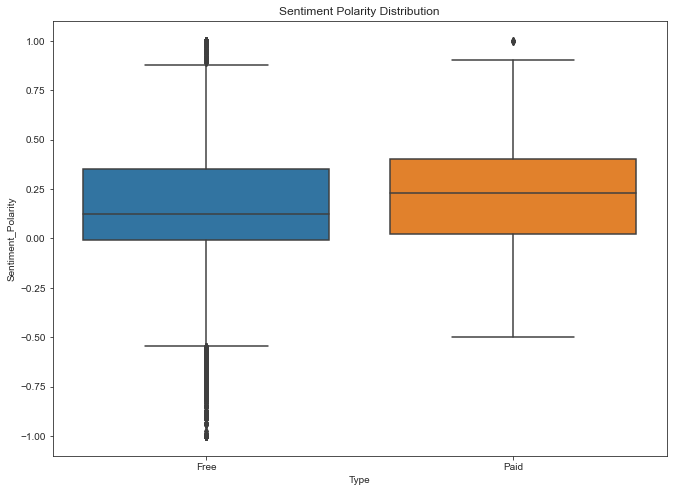

In [29]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x=merged_df['Type'], y=merged_df['Sentiment_Polarity'], data=merged_df)
ax.set_title('Sentiment Polarity Distribution')

> **As we can see, the free apps receive a lot of rude comments, as indicated by the outliers on the negative y-axis. Otherwise, on paid apps appear never found extremely negative reviews.**